### Faculdade de Engenharia Industrial - FEI

### Centro Universitário da Fundação Educacional Inaciana "Padre Sabóia de Medeiros" (FEI)


*FEI's Stricto Sensu Graduate Program in Electrical Engineering*

Concentration area: ARTIFICIAL INTELLIGENCE APPLIED TO AUTOMATION AND ROBOTICS

Master's thesis student Andre Luiz Florentino

***

# Chapter 7: Compile the results

***

## Importe modules

In [1]:
import os
import warnings

import pandas     as pd
import seaborn    as sns
import numpy      as np

from matplotlib  import pyplot  as plt

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 120)

cmap_cm   = plt.cm.Blues
sns.set_style("darkgrid")

In [2]:
# Globals
current_path  = os.getcwd()
path_analysis = os.path.join(current_path, "_analysis")

# Check if the folder exists, if not, create it
if not os.path.exists(path_analysis):
    os.makedirs(path_analysis)

# For the picture names
pic_first_name = '07_Compile_results_'

## Loading the results


In [3]:
# Select the dataset

opc = 0
while str(opc) not in '1234':
    print()
    print("1-) ESC-10")
    print("2-) BDLib2")
    print("3-) US8K")
    print("4-) US8K_AV")


    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0

if opc == 1:

    path        = os.path.join(current_path, "_dataset", "ESC-10")
    path_models = os.path.join(current_path, "ESC-10_saved_models")
    nom_dataset = 'ESC-10' 
    fold        = '1'
    
    
if opc == 2:
    
    path        = os.path.join(current_path, "_dataset", "BDLib2")
    path_models = os.path.join(current_path, "BDLib2_saved_models")
    nom_dataset = 'BDLib2' 
    fold        = 'fold-1'

    
if opc == 3:
    
    path        = os.path.join(current_path, "_dataset", "US8K")
    path_models = os.path.join(current_path, "US8K_saved_models")
    nom_dataset = 'US8K' 
    fold        = '1'

    
if opc == 4:

    path        = os.path.join(current_path, "_dataset", "US8K_AV")
    path_models = os.path.join(current_path, "US8K_AV_saved_models")
    nom_dataset = 'US8K_AV' 
    fold        = '1'


1-) ESC-10
2-) BDLib2
3-) US8K
4-) US8K_AV

Select the dataset: 4


In [4]:
def get_next_file_number(folder: str):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(pic_first_name)]
    if not files:
        return 1
    else:
        numbers = [int(f.split('.')[0].split('_')[-1]) for f in files]
        return max(numbers) + 1

In [5]:
files = [f for f in os.listdir(path_models) if f.endswith('.csv') and f.startswith(nom_dataset) and f.endswith('_no_cm.csv')]
files

['US8K_AV_metrics_set_CNN_2D_augmented_no_cm.csv',
 'US8K_AV_metrics_set_CNN_2D_original_no_cm.csv',
 'US8K_AV_metrics_set_CNN_2D_windowed_no_cm.csv',
 'US8K_AV_metrics_set_NN_norm_augmented_no_cm.csv',
 'US8K_AV_metrics_set_NN_norm_original_no_cm.csv',
 'US8K_AV_metrics_set_NN_norm_PCA_augmented_no_cm.csv',
 'US8K_AV_metrics_set_NN_norm_PCA_original_no_cm.csv',
 'US8K_AV_metrics_set_NN_norm_PCA_windowed_no_cm.csv',
 'US8K_AV_metrics_set_NN_norm_windowed_no_cm.csv',
 'US8K_AV_metrics_set_NN_std_augmented_no_cm.csv',
 'US8K_AV_metrics_set_NN_std_original_no_cm.csv',
 'US8K_AV_metrics_set_NN_std_PCA_augmented_no_cm.csv',
 'US8K_AV_metrics_set_NN_std_PCA_original_no_cm.csv',
 'US8K_AV_metrics_set_NN_std_PCA_windowed_no_cm.csv',
 'US8K_AV_metrics_set_NN_std_windowed_no_cm.csv',
 'US8K_AV_metrics_set_norm_augmented_no_cm.csv',
 'US8K_AV_metrics_set_norm_mutual_augmented_no_cm.csv',
 'US8K_AV_metrics_set_norm_mutual_original_no_cm.csv',
 'US8K_AV_metrics_set_norm_mutual_windowed_no_cm.csv',


In [6]:
files[0]

'US8K_AV_metrics_set_CNN_2D_augmented_no_cm.csv'

In [7]:
batch_type = files[0].split(f'{nom_dataset}_metrics_set_CNN_2D_')[1].split('_no_cm.csv')[0]
batch_type

'augmented'

In [8]:
db = pd.read_csv(os.path.join(path_models, files[0]), sep='\t')
db = db.drop('Unnamed: 0', axis=1)
db.insert(0, 'batch_type', batch_type)
db

,batch_type,index,Model,Fold,...,Precision(Val),Recall(Train),Recall(Val),Process_time
0,augmented,9,Model_CNN_2D_Luz,4,...,0.839721,0.999785,0.832499,2390.625
1,augmented,17,Model_CNN_2D_Luz,8,...,0.844911,1.000000,0.834845,1859.375
2,augmented,11,Model_CNN_2D_Luz,5,...,0.856640,0.999450,0.838059,2140.625
3,augmented,3,Model_CNN_2D_Luz,10,...,0.848036,0.999666,0.841880,2000.000
4,augmented,1,Model_CNN_2D_Luz,1,...,0.872225,1.000000,0.867503,1750.000
5,augmented,13,Model_CNN_2D_Luz,6,...,0.871003,0.999833,0.868478,2062.500
6,augmented,15,Model_CNN_2D_Luz,7,...,0.880783,0.999833,0.878853,1703.125
7,augmented,7,Model_CNN_2D_Luz,3,...,0.886342,1.000000,0.882152,2125.000
8,augmented,5,Model_CNN_2D_Luz,2,...,0.884666,0.999916,0.882818,2203.125
9,augmented,19,Model_CNN_2D_Luz,9,...,0.901645,0.999419,0.901566,1515.625


In [9]:
db.dtypes

batch_type           object
index                 int64
Model                object
Fold                  int64
Accuracy(Train)     float64
Accuracy(Val)       float64
F1(Train)           float64
F1(Val)             float64
Precision(Train)    float64
Precision(Val)      float64
Recall(Train)       float64
Recall(Val)         float64
Process_time        float64
dtype: object

In [10]:
db = db.drop(['Fold', 'index'], axis=1)

new_db = db.groupby(['Model', 'batch_type']).agg(['mean', 'std'])

In [11]:
new_db

Accuracy(Train)           Accuracy(Val)            ... Recall(Val)           Process_time            
                                       mean       std          mean       std  ...        mean       std         mean         std
Model            batch_type                                                    ...                                               
Model_CNN_2D_Luz augmented         0.999790  0.000216      0.862865  0.024357  ...    0.862865  0.024357     1975.000  264.980837
Model_CNN_2D_Su  augmented         0.999849  0.000054      0.852654  0.038797  ...    0.852654  0.038797      946.875  286.145663

[2 rows x 18 columns]

In [12]:
def compile_results(path: str):
    
    files = [f for f in os.listdir(path) if f.endswith('.csv') and f.startswith(nom_dataset) and f.endswith('_no_cm.csv')]

    db_list = []
    extracted_parts = []
    total_samples = 0
    
    for file in files:
        print(file)
        db = pd.read_csv(os.path.join(path_models, file), sep='\t')
        db = db.drop('Unnamed: 0', axis=1)
        samples = int(len(db))
        print(f'Samples: {samples}')
        total_samples = total_samples + samples
        
        cols_to_rename = {'Accuracy(Val)': 'Accuracy(Validation)', 'F1(Val)': 'F1(Validation)',
                          'Precision(Val)': 'Precision(Validation)', 'Recall(Val)': 'Recall(Validation)'}
        db.rename(columns=cols_to_rename, inplace=True)

        db_list.append(db) 
    
        if "_metrics_set_CNN_2D_" in file:
            parts = file.split("_metrics_set_CNN_2D_")[1].split("_")
        elif "_metrics_set_NN_" in file:
            parts = file.split("_metrics_set_NN_")[1].split("_")
        elif "_metrics_set_" in file:
            parts = file.split("_metrics_set_")[1].split("_")

        extracted_part = "_".join(parts[:-2])
        extracted_parts.append(extracted_part)
        print(extracted_part)
        
        db.insert(0, 'batch_type', extracted_part)
        print("===================================================================")
    print(len(extracted_parts))
    print(total_samples)
    print(len(db_list))
    return pd.concat(db_list, ignore_index=True)  

In [13]:
DB = compile_results(path_models)
DB

US8K_AV_metrics_set_CNN_2D_augmented_no_cm.csv
Samples: 20
augmented
US8K_AV_metrics_set_CNN_2D_original_no_cm.csv
Samples: 20
original
US8K_AV_metrics_set_CNN_2D_windowed_no_cm.csv
Samples: 20
windowed
US8K_AV_metrics_set_NN_norm_augmented_no_cm.csv
Samples: 20
norm_augmented
US8K_AV_metrics_set_NN_norm_original_no_cm.csv
Samples: 20
norm_original
US8K_AV_metrics_set_NN_norm_PCA_augmented_no_cm.csv
Samples: 20
norm_PCA_augmented
US8K_AV_metrics_set_NN_norm_PCA_original_no_cm.csv
Samples: 20
norm_PCA_original
US8K_AV_metrics_set_NN_norm_PCA_windowed_no_cm.csv
Samples: 20
norm_PCA_windowed
US8K_AV_metrics_set_NN_norm_windowed_no_cm.csv
Samples: 20
norm_windowed
US8K_AV_metrics_set_NN_std_augmented_no_cm.csv
Samples: 20
std_augmented
US8K_AV_metrics_set_NN_std_original_no_cm.csv
Samples: 20
std_original
US8K_AV_metrics_set_NN_std_PCA_augmented_no_cm.csv
Samples: 20
std_PCA_augmented
US8K_AV_metrics_set_NN_std_PCA_original_no_cm.csv
Samples: 20
std_PCA_original
US8K_AV_metrics_set_NN_std_

,batch_type,index,Model,Fold,...,Precision(Validation),Recall(Train),Recall(Validation),Process_time
0,augmented,9,Model_CNN_2D_Luz,4,...,0.839721,0.999785,0.832499,2390.625
1,augmented,17,Model_CNN_2D_Luz,8,...,0.844911,1.000000,0.834845,1859.375
2,augmented,11,Model_CNN_2D_Luz,5,...,0.856640,0.999450,0.838059,2140.625
3,augmented,3,Model_CNN_2D_Luz,10,...,0.848036,0.999666,0.841880,2000.000
4,augmented,1,Model_CNN_2D_Luz,1,...,0.872225,1.000000,0.867503,1750.000
...,...,...,...,...,...,...,...,...,...
1045,std_windowed,35,Voting,5,...,0.783388,0.938146,0.755604,54890.625
1046,std_windowed,59,Voting,9,...,0.791011,0.936593,0.773090,40828.125
1047,std_windowed,41,Voting,6,...,0.808627,0.935252,0.773913,42468.750
1048,std_windowed,5,Voting,1,...,0.815601,0.935376,0.797669,51468.750


In [14]:
sort_order = ['original', 'augmented', 'windowed',
              'norm_original', 'norm_mutual_original', 'norm_PCA_original', 'norm_augmented', 
              'norm_mutual_augmented', 'norm_PCA_augmented', 'norm_windowed', 'norm_mutual_windowed',
              'norm_PCA_windowed', 'std_original', 'std_PCA_original', 
              'std_augmented', 'std_PCA_augmented', 'std_windowed', 'std_PCA_windowed']

DB['batch_type'] = pd.Categorical(DB['batch_type'], categories=sort_order, ordered=True)

DB     = DB.drop(['Fold', 'index'], axis=1)
new_DB = DB.groupby(['Model', 'batch_type']).agg(['mean', 'std']).sort_values('batch_type')

In [15]:
new_DB

Accuracy(Train)           Accuracy(Validation)            ... Recall(Validation)           Process_time             
                                            mean       std                 mean       std  ...               mean       std         mean          std
Model           batch_type                                                                 ...                                                       
ANN             original                     NaN       NaN                  NaN       NaN  ...                NaN       NaN          NaN          NaN
SVC             original                     NaN       NaN                  NaN       NaN  ...                NaN       NaN          NaN          NaN
Voting          original                     NaN       NaN                  NaN       NaN  ...                NaN       NaN          NaN          NaN
Model_CNN_2D_Su original                0.993920  0.005288             0.827850  0.036015  ...           0.827850  0.036015     215.6250    93.692112
Forest          original                     NaN       NaN                  NaN       NaN  ...                NaN       NaN          NaN          NaN
...                                          ...       ...                  ...       ...  ...                ...       ...          ...          ...
                std_PCA_windowed        1.000000  0.000000             0.731159  0.040284  ...           0.731159  0.040284     735.9375   221.271431
CNN_1D          std_PCA_windowed        0.999556  0.000466             0.752812  0.036357  ...           0.752812  0.036357     675.0000   271.213675
ANN             std_PCA_windowed        0.999996  0.000011             0.766491  0.026347  ...           0.766491  0.026347     107.8125    22.642776
SVC             std_PCA_windowed        0.894100  0.002175             0.758870  0.019588  ...           0.758870  0.019588    5089.0625  1165.411574
Voting          std_PCA_windowed        0.925758  0.001591             0.744931  0.027875  ...           0.744931  0.027875    9081.2500  1427.744676

[180 rows x 18 columns]

In [16]:
new_DB = new_DB.dropna(how="all")
new_DB

Accuracy(Train)           Accuracy(Validation)            ... Recall(Validation)           Process_time             
                                             mean       std                 mean       std  ...               mean       std         mean          std
Model            batch_type                                                                 ...                                                       
Model_CNN_2D_Su  original                0.993920  0.005288             0.827850  0.036015  ...           0.827850  0.036015     215.6250    93.692112
Model_CNN_2D_Luz original                0.996715  0.003899             0.841375  0.034324  ...           0.841375  0.034324     504.6875   138.006092
                 augmented               0.999790  0.000216             0.862865  0.024357  ...           0.862865  0.024357    1975.0000   264.980837
Model_CNN_2D_Su  augmented               0.999849  0.000054             0.852654  0.038797  ...           0.852654  0.038797     946.8750   286.145663
Model_CNN_2D_Luz windowed                0.999731  0.000327             0.769802  0.043271  ...           0.769802  0.043271     631.2500   195.461749
...                                           ...       ...                  ...       ...  ...                ...       ...          ...          ...
Forest           std_PCA_windowed        1.000000  0.000000             0.731159  0.040284  ...           0.731159  0.040284     735.9375   221.271431
CNN_1D           std_PCA_windowed        0.999556  0.000466             0.752812  0.036357  ...           0.752812  0.036357     675.0000   271.213675
ANN              std_PCA_windowed        0.999996  0.000011             0.766491  0.026347  ...           0.766491  0.026347     107.8125    22.642776
SVC              std_PCA_windowed        0.894100  0.002175             0.758870  0.019588  ...           0.758870  0.019588    5089.0625  1165.411574
Voting           std_PCA_windowed        0.925758  0.001591             0.744931  0.027875  ...           0.744931  0.027875    9081.2500  1427.744676

[105 rows x 18 columns]

In [17]:
new_DB_reset = new_DB.reset_index()

top_accuracies = new_DB_reset[('Accuracy(Validation)', 'mean')].groupby(new_DB_reset['Model']).nlargest(1).reset_index()

merged = pd.merge(top_accuracies, new_DB_reset, on=['Model', ('Accuracy(Validation)', 'mean')], how='left')

result = merged[[('Model',     ''), ('batch_type',     ''), ('Accuracy(Validation)', 'mean'), ('Accuracy(Validation)', 'std')]]

result_sorted = result.sort_values(by=[('Accuracy(Validation)', 'mean')], ascending=False)

In [18]:
# Highest averaged accuracy per model

result_sorted.style.background_gradient(cmap = cmap_cm)

In [19]:
model = 'ANN'
data = new_DB.loc[model]
data

Accuracy(Train)           Accuracy(Validation)            ... Recall(Validation)           Process_time           
                              mean       std                 mean       std  ...               mean       std         mean        std
batch_type                                                                   ...                                                     
norm_original             0.998394  0.002778             0.833530  0.029141  ...           0.833530  0.029141      43.7500  16.137431
norm_PCA_original         0.997802  0.004022             0.833249  0.029622  ...           0.833249  0.029622      32.8125   8.869472
norm_augmented            1.000000  0.000000             0.837870  0.033816  ...           0.837870  0.033816      70.3125  18.414239
norm_PCA_augmented        0.999987  0.000020             0.822420  0.029458  ...           0.822420  0.029458      84.3750  19.764235
norm_windowed             0.999996  0.000011             0.779297  0.032924  ...           0.779297  0.032924      92.1875  25.989531
norm_PCA_windowed         0.999996  0.000011             0.772215  0.019176  ...           0.772215  0.019176     104.6875  27.609080
std_original              0.999950  0.000105             0.833792  0.026361  ...           0.833792  0.026361      34.3750   6.588078
std_PCA_original          1.000000  0.000000             0.828216  0.029455  ...           0.828216  0.029455      37.5000  13.176157
std_augmented             0.999992  0.000018             0.829402  0.031684  ...           0.829402  0.031684      85.9375  22.401889
std_PCA_augmented         1.000000  0.000000             0.826291  0.031179  ...           0.826291  0.031179      95.3125  37.158456
std_windowed              1.000000  0.000000             0.772551  0.026872  ...           0.772551  0.026872     103.1250  28.716768
std_PCA_windowed          0.999996  0.000011             0.766491  0.026347  ...           0.766491  0.026347     107.8125  22.642776

[12 rows x 18 columns]

In [20]:
data = new_DB.loc['ANN'].reset_index()
data

batch_type Accuracy(Train)           Accuracy(Validation)  ... Recall(Validation)           Process_time           
                                  mean       std                 mean  ...               mean       std         mean        std
0        norm_original        0.998394  0.002778             0.833530  ...           0.833530  0.029141      43.7500  16.137431
1    norm_PCA_original        0.997802  0.004022             0.833249  ...           0.833249  0.029622      32.8125   8.869472
2       norm_augmented        1.000000  0.000000             0.837870  ...           0.837870  0.033816      70.3125  18.414239
3   norm_PCA_augmented        0.999987  0.000020             0.822420  ...           0.822420  0.029458      84.3750  19.764235
4        norm_windowed        0.999996  0.000011             0.779297  ...           0.779297  0.032924      92.1875  25.989531
5    norm_PCA_windowed        0.999996  0.000011             0.772215  ...           0.772215  0.019176     104.6875  27.609080
6         std_original        0.999950  0.000105             0.833792  ...           0.833792  0.026361      34.3750   6.588078
7     std_PCA_original        1.000000  0.000000             0.828216  ...           0.828216  0.029455      37.5000  13.176157
8        std_augmented        0.999992  0.000018             0.829402  ...           0.829402  0.031684      85.9375  22.401889
9    std_PCA_augmented        1.000000  0.000000             0.826291  ...           0.826291  0.031179      95.3125  37.158456
10        std_windowed        1.000000  0.000000             0.772551  ...           0.772551  0.026872     103.1250  28.716768
11    std_PCA_windowed        0.999996  0.000011             0.766491  ...           0.766491  0.026347     107.8125  22.642776

[12 rows x 19 columns]

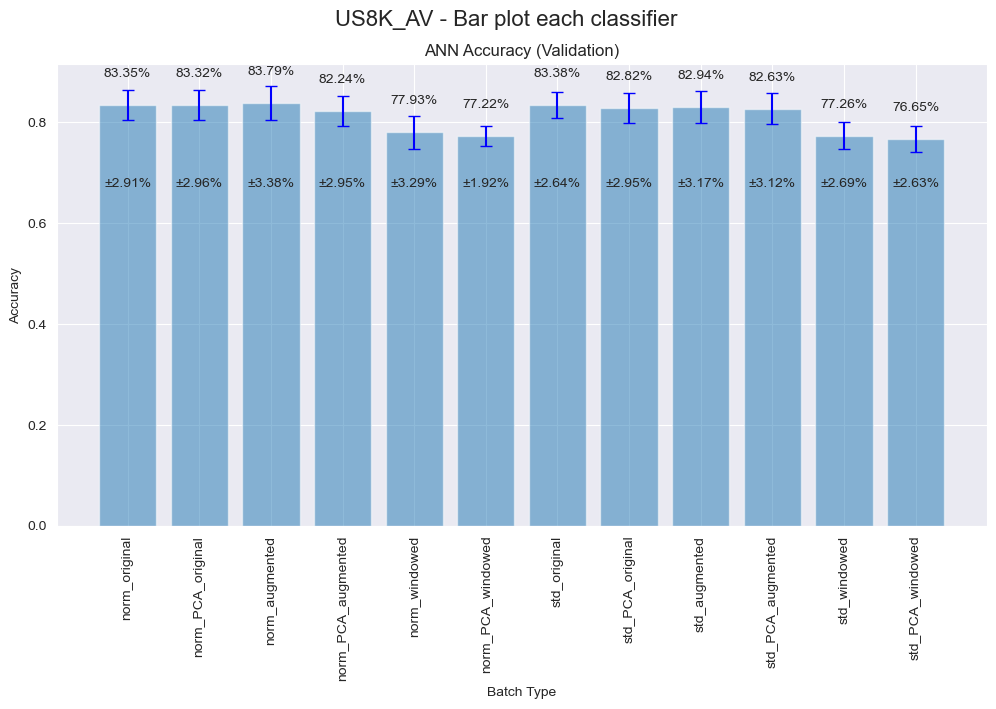

In [21]:
# Reset index for easier plotting
data = new_DB.loc['ANN'].reset_index()

plt.figure(figsize=(12,6))
plt.suptitle(f'{nom_dataset} - Bar plot each classifier', fontsize = 16,  y=0.97)

# Create a bar plot of mean accuracy with error bars representing standard deviation
plt.bar(data['batch_type'], data[('Accuracy(Validation)', 'mean')], 
        yerr=data[('Accuracy(Validation)', 'std')], capsize=4,
        alpha=0.5, ecolor='blue')

# Add title and labels
plt.title(f'{model} Accuracy (Validation)')
plt.xlabel('Batch Type')
plt.ylabel('Accuracy')

min_y = data[('Accuracy(Validation)', 'mean')].min() - 0.1

# Add accuracy values on the plot
for x, y in zip(data.index, data[('Accuracy(Validation)', 'mean')]):
    plt.text(x, y + 0.05, f'{str(round(y*100, 2))}%', ha='center', va='bottom')
    
for x, y in zip(data.index, data[('Accuracy(Validation)', 'std')]):
    plt.text(x, min_y , f'±{str(round(y*100, 2))}%', ha='center', va='bottom')

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


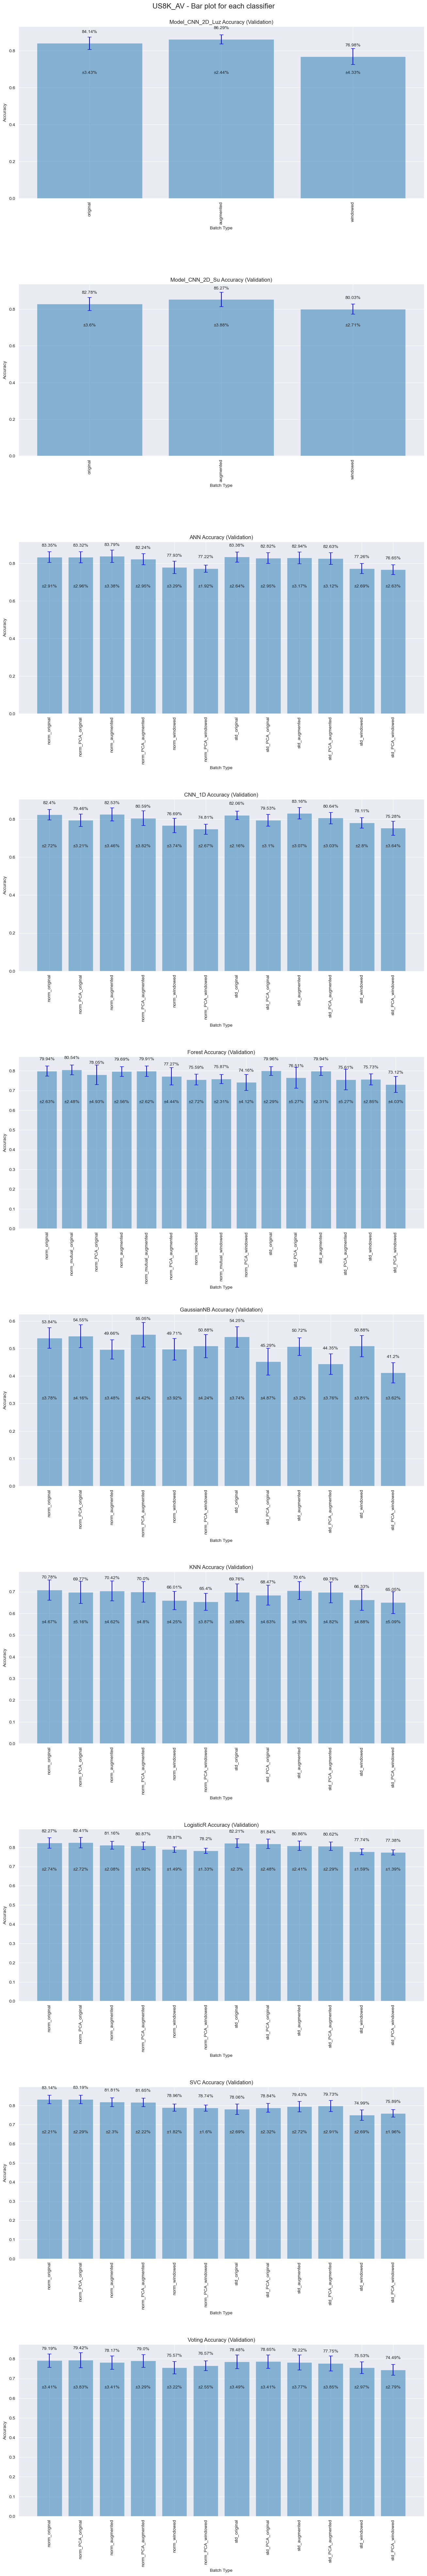

In [22]:
models = DB['Model'].unique()

n_rows = len(models)

fig, axs = plt.subplots(n_rows, 1, figsize=(14,8*n_rows))
plt.suptitle(f'{nom_dataset} - Bar plot for each classifier', fontsize = 16,  y=0.99)

for idx, model in enumerate(models):
    data = new_DB.loc[model].reset_index()

    axs[idx].bar(data['batch_type'], data[('Accuracy(Validation)', 'mean')], 
                 yerr=data[('Accuracy(Validation)', 'std')], capsize=4,
                 alpha=0.5, ecolor='blue')

    axs[idx].set_title(f'{model} Accuracy (Validation)')
    axs[idx].set_xlabel('Batch Type')
    axs[idx].set_ylabel('Accuracy')

    min_y = data[('Accuracy(Validation)', 'mean')].min() - 0.1

    for x, y in zip(data.index, data[('Accuracy(Validation)', 'mean')]):
        axs[idx].text(x, y + 0.05, f'{str(round(y*100, 2))}%', ha='center', va='bottom')

    for x, y in zip(data.index, data[('Accuracy(Validation)', 'std')]):
        axs[idx].text(x, min_y , f'±{str(round(y*100, 2))}%', ha='center', va='bottom')

    axs[idx].set_xticks(data.index)
    axs[idx].set_xticklabels(data['batch_type'], rotation=90)

plt.tight_layout(pad=4.0)
picture_name = f'{pic_first_name}{nom_dataset}_{get_next_file_number(path_analysis):02d}.png'
plt.savefig(os.path.join(path_analysis, picture_name))

In [23]:
for batch in np.unique(DB['batch_type']):
    print(batch)
    DB[DB['batch_type'] == batch]

augmented
norm_PCA_augmented
norm_PCA_original
norm_PCA_windowed
norm_augmented
norm_mutual_augmented
norm_mutual_original
norm_mutual_windowed
norm_original
norm_windowed
original
std_PCA_augmented
std_PCA_original
std_PCA_windowed
std_augmented
std_original
std_windowed
windowed


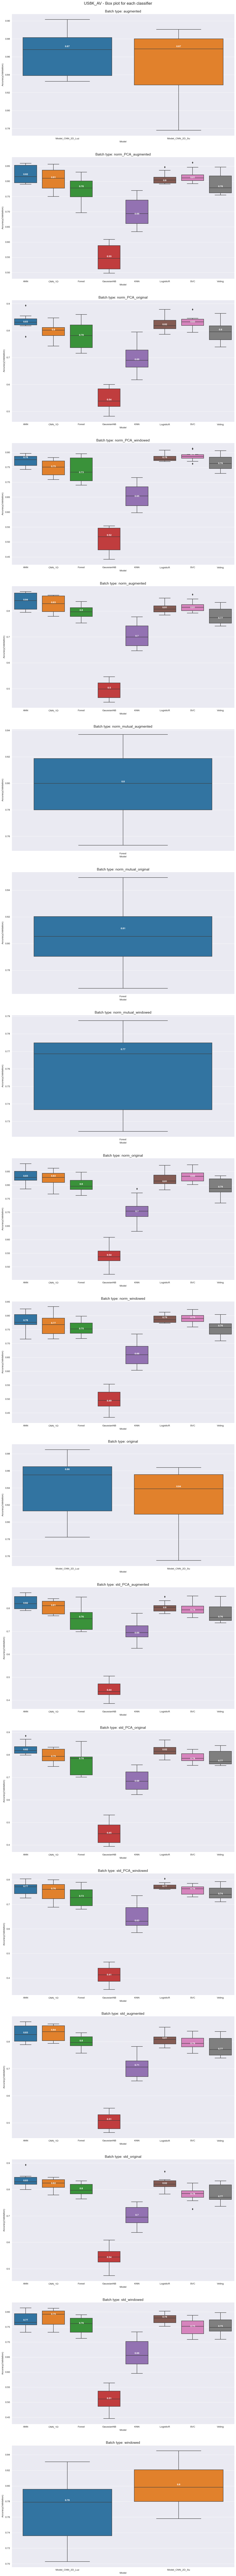

In [24]:
n_batches = len(np.unique(DB['batch_type']))
fig, axs = plt.subplots(n_batches, figsize=(14,8*n_batches))
plt.suptitle(f'{nom_dataset} - Box plot for each classifier', fontsize = 16, y=0.994)

for i, batch in enumerate(np.unique(DB['batch_type'])):
    dbPlot = DB[DB['batch_type'] == batch]
    
    axs[i].set_title(f'Batch type: {batch}', fontsize = 14)
    box_plot = sns.boxplot(data=dbPlot, x="Model", y="Accuracy(Validation)", showfliers = True, ax=axs[i])

    medians = list(dbPlot.groupby(['Model'], sort=False)['Accuracy(Validation)'].median())
    medians = [round(element, 2) for element in medians]

    vertical_offset = dbPlot['Accuracy(Validation)'].median()*0.001  # offset from median for display

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
                horizontalalignment='center',size='medium',color='w',weight='semibold')

plt.tight_layout(pad=4.0)
picture_name = f'{pic_first_name}{nom_dataset}_{get_next_file_number(path_analysis):02d}.png'
plt.savefig(os.path.join(path_analysis, picture_name))

## Compiled results in Excel

### Color gradient by classifier - Original x Augmented

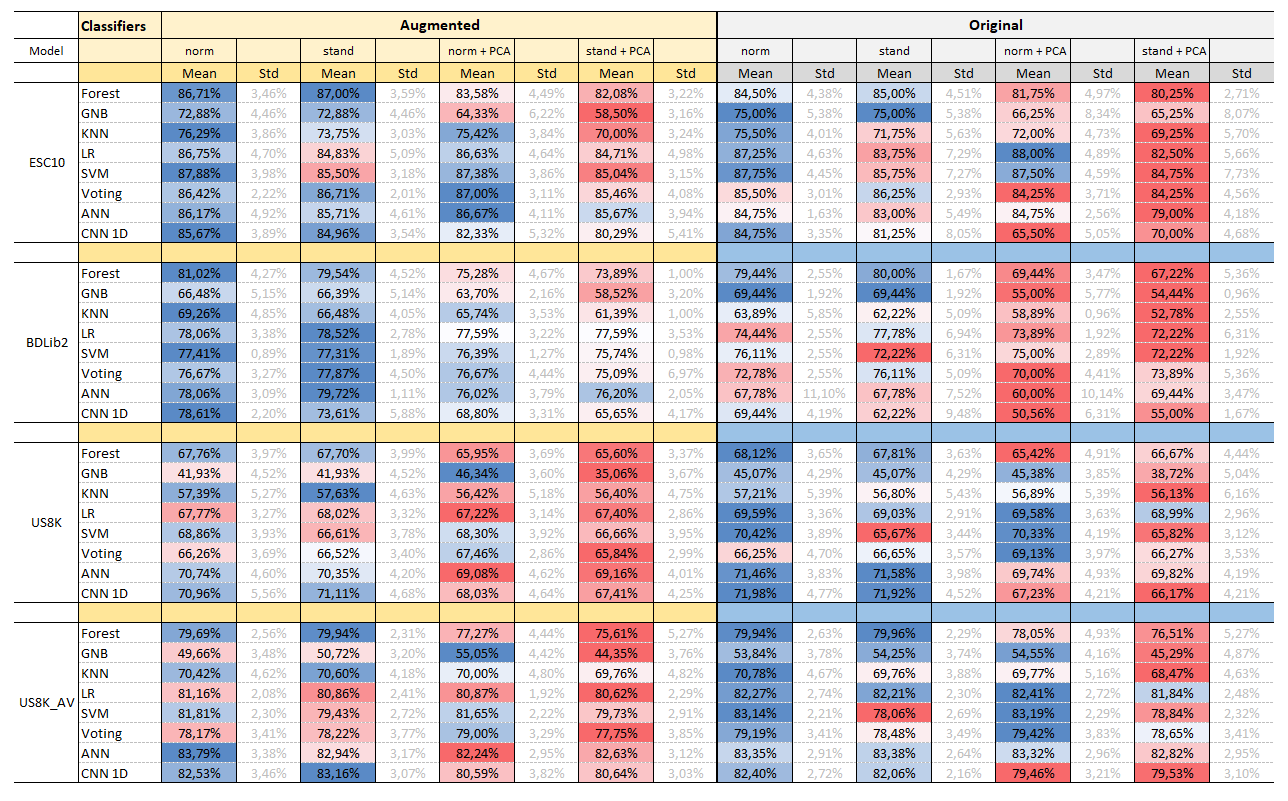

### Color gradient by dataset - Original x Augmented

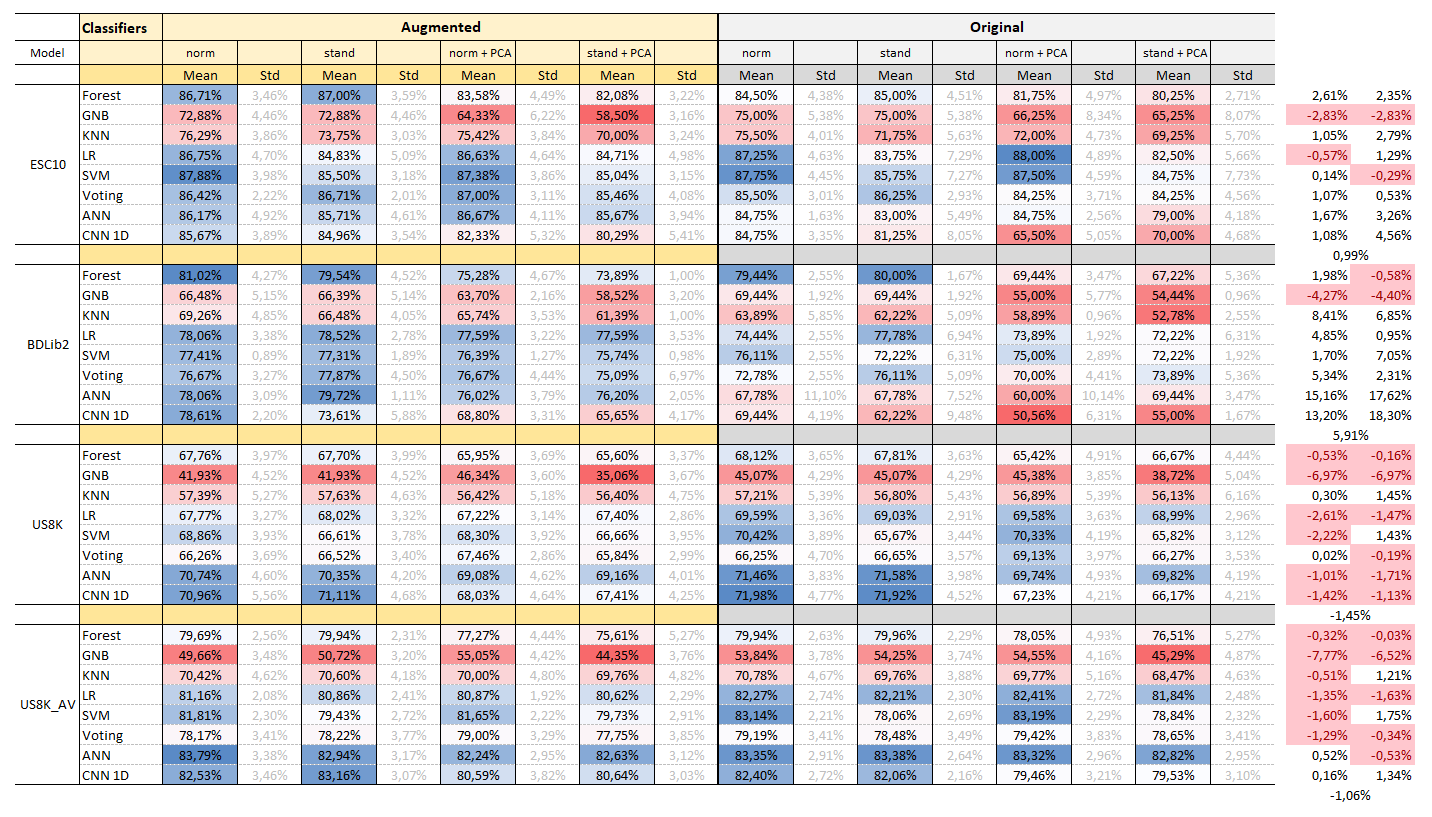

### Color gradient by classifier - Augmented x Windowed

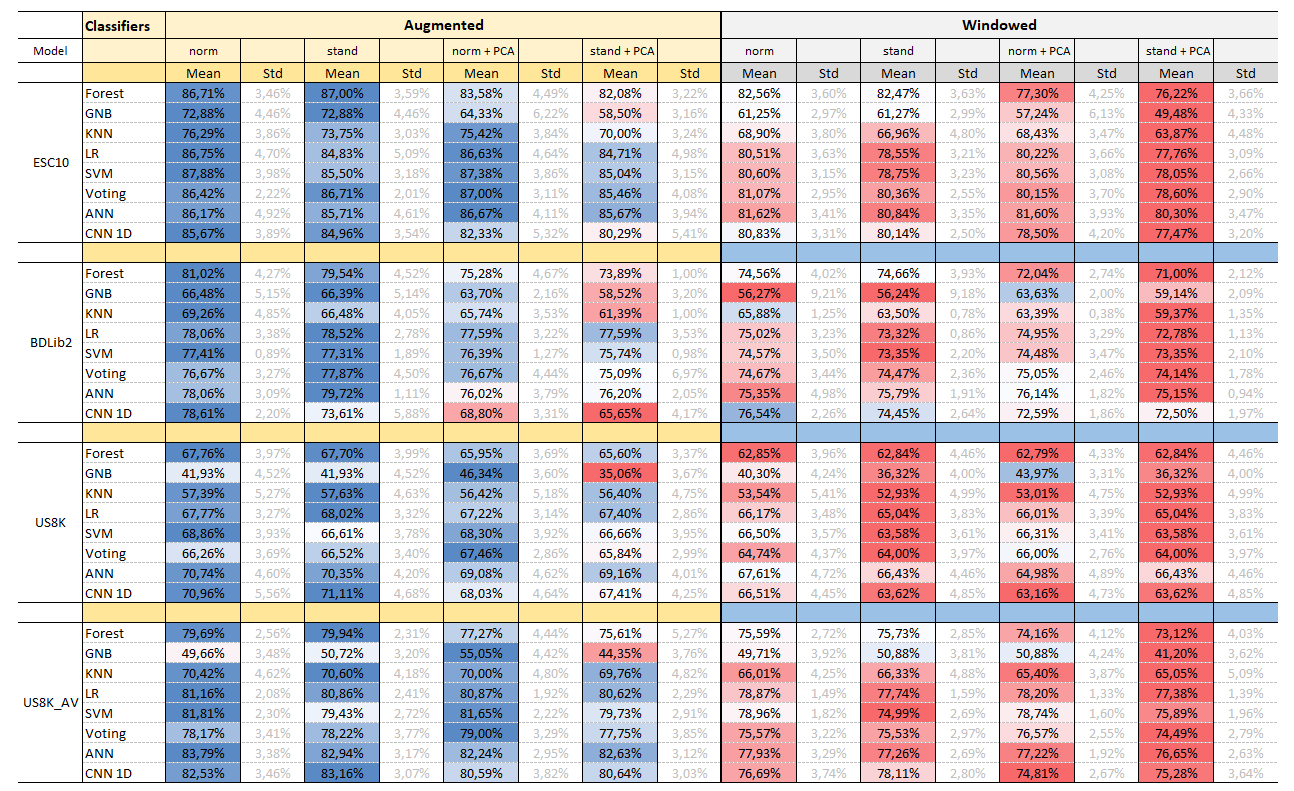

### Color gradient by classifier - Augmented x Windowed

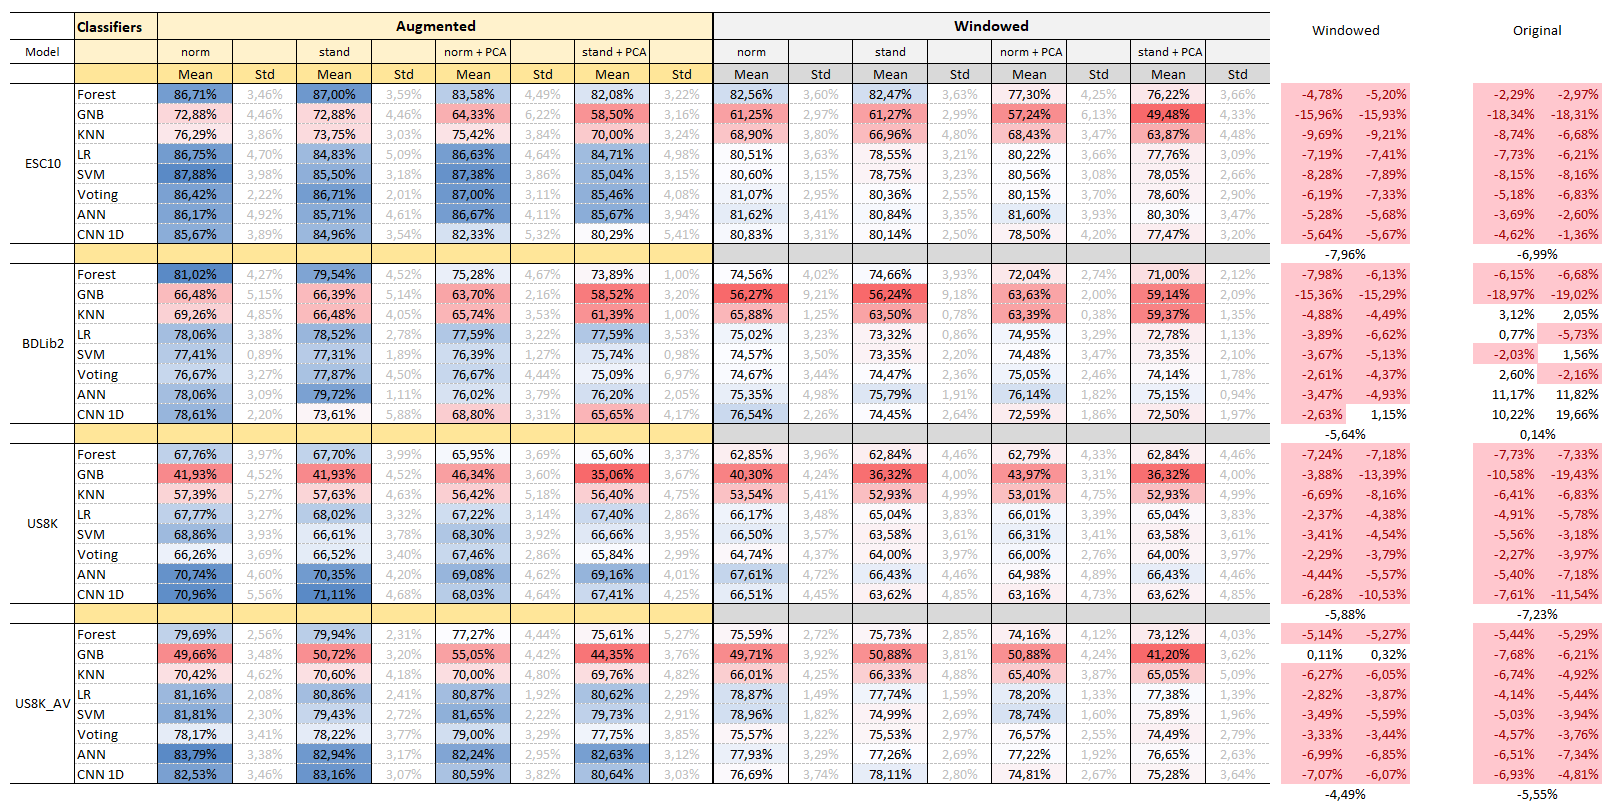

# End of the notebook

# 

# 

# 